# Explosivity and unsaturations

intro sur le projeej XXX

# Getting molecular smiles from the iupac name

Smiles are very practical from a programming point of view, they are very easy for a machine to interprate. For a person, not so much, a chemist generally knows substances by their name. For this reason, it's important to give the possibility to input the IUPAC name of a molecule. The function takes as an input the name of the molecule on the form a string and returns its smiles

In [1]:
#Let's import the function
from explosivity_and_unsaturations import iupac_to_smiles

This function is a bit particular, since it relies on the internet to give back a result. In fact, it utilizes the data on https://cactus.nci.nih.gov/chemical/structure. In theory the function could also have been made with our own database, but its much easier to use a prexisting one.
Let's try hit for a few known compounds and gibberish, to see if it gives back an error:

In [2]:
print(iupac_to_smiles("water"))
print(iupac_to_smiles("ethanol"))
print(iupac_to_smiles("benzene"))
print(iupac_to_smiles("acetic acid"))
print(iupac_to_smiles("cyclopentane"))
print(iupac_to_smiles("etcestcommecaquejeej"))

O
CCO
c1ccccc1
CC(O)=O
C1CCCC1
Error: HTTP Error 500: INTERNAL SERVER ERROR
Unable to convert IUPAC name to SMILES


The function seems to work as expected: a IUPAC name is given to it and it returns the smiles. If the name doesn' exist, it rises an error.

# Canonicalize the molecule' smiles 

In [3]:
#Let's import the function named canonicalize_smiles
from explosivity_and_unsaturations import canonicalize_smiles

This function accepts a smiles string, and an optional boolean to know if python should raise an error box popup. Do not set the second argument to True in a Jupyter notebook !



There are many ways to encode a molecule with a smiles.

For example, we could encode carbon dioxyde with "O=C=O", or with "C(=O)=O"

To make some order, and to reject smiles of the wrong format by raising errors. Canonicalization takes a smiles and transforms it into the standard notation smiles.

Lets try our smiles for carbon dioxide

In [4]:
print(canonicalize_smiles("O=C=O"))
print(canonicalize_smiles("C(=O)=O"))

O=C=O
O=C=O


The two smiles depicting the same molecule was transformed into a single one

Lets try with gibberish

In [5]:
canonicalize_smiles("ghqgzcf")

[22:52:22] SMILES Parse Error: syntax error while parsing: ghqgzcf
[22:52:22] SMILES Parse Error: Failed parsing SMILES 'ghqgzcf' for input: 'ghqgzcf'


ValueError: Could not convert input to mol

Good, an error is raised.

Trying with an impossible moecule "C=O=O"


In [6]:
canonicalize_smiles("C=O=O")

[22:52:23] Explicit valence for atom # 1 O, 4, is greater than permitted


ValueError: Could not convert input to mol

If the valence is not respected, the error is raised.

In [7]:
canonicalize_smiles("C=[O++]=O")

'C=[O+2]=O'

Now it works, because the charge is respected

# Finding special explosible groups and unsaturations

In [8]:
from explosivity_and_unsaturations import findgroups, findinsaturation
# Importing our two functions

Those function accepts a molecule smiles

The output for *findgroups* is a tuple with a dictionary and a counter: (dict, number)

The dictionary has for keys the *SMARTS* of the groups of interests (unsaturations and explosible groups), and for values tuples containing the indexes of the found insaturations atoms involved in the unsaturations and explosible groups

The counter is the number of fragments found to be explosible.

*findinsaturation* only returns a dictionary


Let's try those functions on the nitrotetrazole molecule of smiles "C1=NN=NN1\[N+](=O)[O-]" 

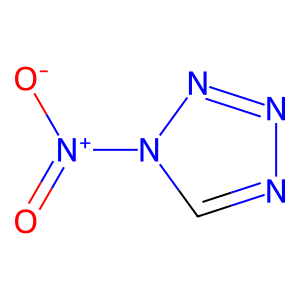

In [9]:
# Making sure to be able to display the molecule
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 300,300

smiles = "C1=NN=NN1[N+](=O)[O-]"
# This is the smiles for nitrotetrazole
mol = Chem.MolFromSmiles(smiles)
# Creating the rdkit molecule object from the smiles
mol

We can graphicaly find the unsaturations and explosible groups in the molecule, but we can ask the function to make a dictionary to match for us the substructures.

In [10]:
dico,group_check = findgroups(smiles)
dico

{'[#6]#[#6]': (),
 '[#6]=[#6]-[#6]=[#6]': (),
 '[#6-]': (),
 '[#6]-[Mg]': (),
 '[#6]-[Li]': (),
 '[#6]-[Cu]': (),
 '[#6]-[Ni]': (),
 '[#7-]-[#7+]#[#7]': (),
 '[#7]=[#7+]=[#7-]': (),
 '[#7]-[#7+]=[#7-][#7]=[#7]': (),
 'nn': ((1, 2), (2, 3), (3, 4)),
 '[#7-]#[#7]': (),
 '[#7]-[#7]': ((4, 5),),
 '[#8]-[#8]': (),
 '[#8]-[#8]-[#8]': (),
 '[#6]-1-[#8]-[#8]-[#6]-[#8]-1': (),
 '[#7]-[#8]': ((5, 7),),
 '[#7]=[#8]': ((5, 6),),
 '[#7]#[#8]': (),
 '[#7]-[I]': (),
 '[#7]-[Br]': (),
 '[#7]-[Cl]': (),
 '[#7]-[F]': (),
 '[#7]=[I]': (),
 '[#7]=[Br]': (),
 '[#7]=[Cl]': (),
 '[#7]=[F]': (),
 '[#8]-[I]': (),
 '[#8]-[F]': (),
 '[#8]-[Br]': (),
 '[#8]-[Cl]': (),
 '[#8]=[I]': (),
 '[#8]=[Br]': (),
 '[#8]=[Cl]': (),
 '[#8]=[F]': (),
 '[#6]#[#7+]-[#8-]': (),
 '[Ag+].[N-3]': ()}

In [11]:
print(f"The number of found explosible fragments is {group_check}")

The number of found explosible fragments is 4


We can see that the dictionary is mostly empty, except for the *SMARTS* 

- nn = aromatic Nitrogen-Nitrogen bond
- [#7]-[#8] = single Nitrogen-Oxygen bond
- [#7]=[#8] = double Nitrogen-Oxygen bond
- [#7]-[#7] = single Nitrogen-Nitrogen bond

It also gets the number of found fragments, but it does not in general represent the number of single explosible groups

Lets try the **findinsaturation** function on the same molecule

In [12]:
dico = findinsaturation(smiles)
dico

{'[*]=[*]': ((5, 6),),
 '[*]#[*]': (),
 'aa': ((0, 1), (0, 4), (1, 2), (2, 3), (3, 4)),
 '[*]@[*]': ((0, 1), (0, 4), (1, 2), (2, 3), (3, 4))}

The dictionary found double bonds and aromatic bonds. 

Why are the results for 'aa' and '[\*]@[*]' the same ?

'aa' is an aromatic bond under smiles notation, and '[\*]@[*]' is aromatic under smarts notation.
Like this no edge cases are missed. 

#### What groups can be found by *findgroups* ?

The function can find:
- acetylides
- 1,3-dienes
- Grignard and organilithium reagents
- azide and azo compounds
- diazonium salts
- hydrazines
- peroxides
- ozodides
- hydroxylamines
- nitrates, nitrites
- N-oxydes
- oxazole
- hypochlorites, chlorites, chlorates, perchlorates
- fluoramines, chloramines, bromamines, iodamines
- fulminates
- silver nitride

# Highlighting groups of interest in the molecule

In [13]:
from explosivity_and_unsaturations import highlightmol
# Importing our function

This function accepts for inputs the smiles of a molecule and a dictionary containing the indexes of atoms to highlight (the dictionary can be created by *findgroups* or *findinsaturation* functions of this package)

The output is an image object with the atoms and their bounds highlighted in accordance to the dictionary

Lets test a simple molecule, trinitrotoluene, of smiles "Cc1c(cc(cc1\[N+](=O)[O-])\[N+](=O)[O-])\[N+](=O)[O-]"

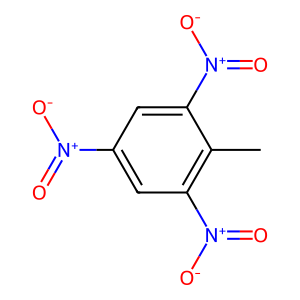

In [14]:
# Making sure to be able to display the molecule
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 300,300

smiles = "Cc1c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-]"
# This is the smiles for nitrotetrazole
mol = Chem.MolFromSmiles(smiles)
# Creating the rdkit molecule object from the smiles
mol

We want to highlight the explosible groups.

Let's recall the dictionary created by *findgroups*:

In [15]:
from explosivity_and_unsaturations import findgroups
(dico,uselessvariable) = findgroups(smiles)

Lets now create the image object

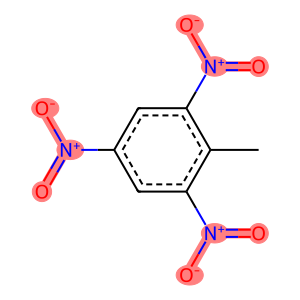

In [16]:
image = highlightmol(smiles, dico)
image

#### What happens if two groups are next to one another ?

Lets try a hypothetical molecule to see of the bonds get highlighted at the wrong place

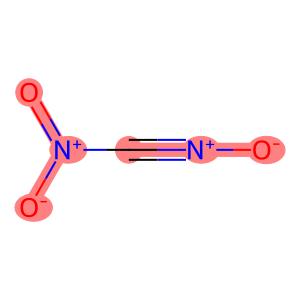

In [17]:
smiles = "C(#[N+][O-])[N+](=O)[O-]"
(dico,uselessvalue) = findgroups(smiles)
image = highlightmol(smiles, dico)
image

We can see that even if all the atoms are highlighted, not all bonds are. This permits us to visualise the different groups found, in this case a fulminate group and a nitro group

# Determine if an atom object is a metal

In [18]:
#Let's import the function named balox
from explosivity_and_unsaturations import ismetal

This function accepts an rdkit atom object as an input

It outputs True if the atom is considered a metal, False otherwise

Let's try it on an organometalic molecule: We want to find the symbol of the metals as well as their position in the molecule

Lets look at the example of vitamine B12

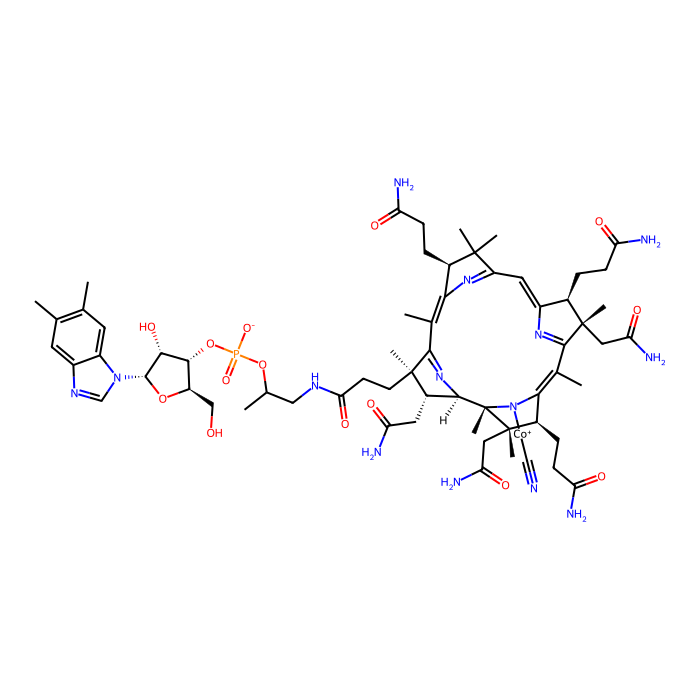

In [19]:
# Making sure to be able to display the molecule
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 700,700

smiles = "NC(=O)C[C@@]8(C)[C@H](CCC(N)=O)C=2/N=C8/C(/C)=C1/[C@@H](CCC(N)=O)[C@](C)(CC(N)=O)[C@@](C)(N1[Co+]C#N)[C@@H]7/N=C(C(\C)=C3/N=C(/C=2)C(C)(C)[C@@H]3CCC(N)=O)[C@](C)(CCC(=O)NCC(C)OP([O-])(=O)O[C@@H]6[C@@H](CO)O[C@H](n5cnc4cc(C)c(C)cc45)[C@@H]6O)[C@H]7CC(N)=O"
# This is the smiles for vitamine B12
mol = Chem.MolFromSmiles(smiles)
# Creating the rdkit molecule object from the smiles
mol
# Displaying the molecule object

We can notice that this is not the optimal way to search the metals in a molecule

Lets create a function that gives is the metals in a molecule, as well as its position

In [20]:
for atom in mol.GetAtoms():            # Loop over all atoms in the molecule 
    if ismetal(atom):                  # Determine if the atom is a metal
        print(f"Found metal of symbol {atom.GetSymbol()} in position {atom.GetIdx()} in our molecule object")


Found metal of symbol Co in position 33 in our molecule object


This method is a lot more efficient to find metals, especialy in large molecules

### What atoms does the function recognises as a metal ?

The atoms shown in red on this periodic table are recognised as metals

![Periodic table](https://github.com/Chemikarl/testproject/blob/master/notebooks/pictures/metals.png?raw=true)

Why are Germanium **[Ge]** and Antimony **[Sb]** considered to be metals? 

The oxygen balance formula used in the function **balox** needs to count the atoms that form oxides after combustion. This is why germanium and antimony are added. 

# Find the oxygen balance of a molecule from a smiles

In [21]:
#Let's import the function named balox
from explosivity_and_unsaturations import balox

Lets try this function on a simple molecule, methane, of smiles "C".

Our function takes for input the string smiles of a molecule, and returns the oxygen balance as a float

In [22]:
balox("C")


-398.92788131895543

We see a simple result, a very negative float .

Lets try with a similar molecule, but containing some oxygen: methanol of smiles "CO"

In [23]:
balox("O=C=O")

-0.0

The oxygen balance is at 0, meaning that the molecule is fully oxydised

Lets try adding more oxygen, and less carbon: ozone, of smile "[O-][O+]=O"

In [24]:
balox("[O-][O+]=O")

100.00625039064941

Now the balance is very positive.

We can conclude that this function outputs a float that indicates the oxygen excess or lack thereoff in a molecule. A positive oxygen balance means that the molecule contains an excess of oxygen, a negative balance means a lack of oxygen, and a neutral balance means that overal, the molecule is fully oxidized.


### How could this be of any use ?

The oxygen balance is important when pyrotechniques are developped or reaserched. For example, if a pyrotechnique mix has a lack of oxygen, the combustion gases may contain unreacted matter, possibly leading to the of clogging a rocket motor. Very low oxygen balance would result in an inert compound. An excess of oxygen may lead to the degradation of the container, or  result in an unstable compound. 
The oxygen balance is also used to classify explosives in terms of their instability.


### What happenes in that function ?

The formula behind the oxygen balance is as follows

OB = -1600 (2X + Y/2 + M - Z)

$$
\displaystyle\frac{-1600 (2X + Y/2 + M - Z)}{MolecularWeight}
$$

With X the number of carbons, Y the number of hydrogens, M the number of metals, and Z the number of oxygens. 
This formula stems from the reaction of the molecule within itself
$
$\]


# Determining if a molecule is explosive or not from two checks

In [25]:
from explosivity_and_unsaturations import explosivity
# Importing our function

The function accepts a molecule oxygen's balance as a float (see *balox* function) and a counter for the number of found explosive groups (see *findgroups*)

From these two descriptors, it determines the explosivity potential of the molecule.

It returns a string representing the found properties

##### Case where no explosible groups were found


In [26]:
explosivity(123456789, 0)

'No explosible groups, the molecule is not explosive.'

When no groups are found, the molecule is by default non-explosive, even if it has a favorable oxygen balance (see *balox*).

However, some groups might have been ommitted by *findgroups*.

##### Cases were explosible groups were found

If explosible groups are found, the oxygen balance determines the strength of the explosive. 

If the oxygen balance is:
- lower than -200, the molecule is **not considered explosive**
- between -200 and -160, it is considered **mildly explosive**
- between -160 and -80, it is considered **explosive**
- between -80 and 12, it is considered **very explosive**
- higher than 12, it is considered **explosive**

This range was taught by the professor Jean Luc Marendaz.

If the oxygen is too low, there is not enough oxygen inside the molecule to sustain a combustion in a closed space.

If the oxygen balance is too high, there is not enough fuel for all the oxygen, the molecule is not optimized, but still explosive

If the oxygen balance is close to 0, the molecule is very dangerous as the self-combustion is very efficient.


#### Examples

Lets try different molecules, using other functions in the module to calculate for us the oxygen balance and count the explosive groups

In [27]:
from explosivity_and_unsaturations import canonicalize_smiles, findgroups, balox, explosivity, iupac_to_smiles

list = ["nitrodecane","nitrobutane", "nitropropane","nitromethane", "ozone"]

#iterate over all names in the proposed list
for name in list:

    # use iupac_to_smiles to convert the name to its smiles
    smiles = iupac_to_smiles(name)

    #canonicalize the smiles
    smiles=canonicalize_smiles(smiles) 

    # find the explosible groups and count them
    (dico,group_check)=findgroups(smiles)

    #calculate the oxygen balance
    oxygen_balance = balox(smiles)

    # test if the molecule is exposive with our function explosivity
    print(f"For {name},{explosivity(oxygen_balance,group_check)}")

For nitrodecane,              The oxygen balance is: -244,the molecule is not explosive.              
For nitrobutane,              The oxygen balance is -163,the molecule is a mildly explosive.              
For nitropropane,              The oxygen balance is -135,the molecule is explosive.              
For nitromethane,              The oxygen balance is -40,the molecule is very explosive.              
For ozone,              The oxygen balance is 100,the molecule is explosive.              


# Find the number of insaturations in molecule

Unsaturation is an important concept in chemistry. The degree of unsaturation is influenced by double bonds triple bonds and cycles in a molecule.

In [28]:
#Let's start by importing the function
from explosivity_and_unsaturations import insat

#Let's also draw those molecules to visualize the unsaturations
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.molSize = 300,300

Let's test if it is able to find the different strucutures that influence the degree of unsaturations.

Firstly, double bonds. If I give the smiles "C=CCC" it should give back 1, because we have one double bond:

The degree of insaturation is 1.0.


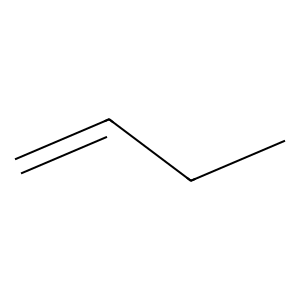

In [29]:
print(insat("C=CCC"))
butandiene = Chem.MolFromSmiles("C=CCC")
butandiene

If we now test the molecule with smiles "CCC#CCC", it should give back 2. We have only one triple bond, but they count 2 in the degree of unsaturation.

The degree of insaturation is 2.0.


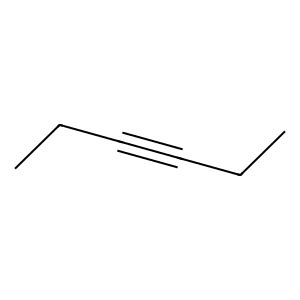

In [30]:
print(insat("CCC#CCC"))
hexine = Chem.MolFromSmiles("CCC#CCC")
hexine

The last structure we need to test is the cycle, if I give the smiles "C1CCCC1", the function should give back 1.0

The degree of insaturation is 1.0.


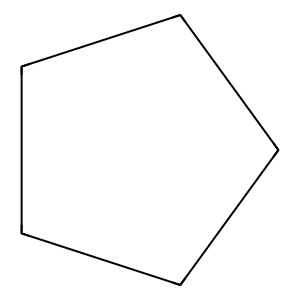

In [31]:
print(insat("C1CCCC1"))
cyclopentane = Chem.MolFromSmiles("C1CCCC1")
cyclopentane

Generally, the concept of unsaturations is only applied in molecules containing carbons. For example, in the most common used definition of degreee of unsaturation, a molecule like sulfruric acid, H2SO4, would have a degree of unsaturation of 0, event though it contains two double bonds. In this function, the concept of degree of unsaturation was generalized including these kind of cases too.

The degree of insaturation is 2.0.


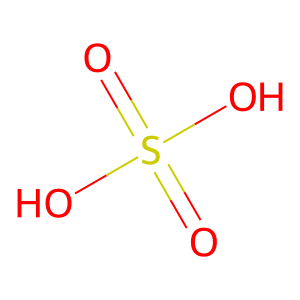

In [32]:
print(insat("OS(=O)(=O)O"))
sulfuric_acid= Chem.MolFromSmiles("OS(=O)(=O)O")
sulfuric_acid

#### How can this be of any use?

The degree of unsaturation is useful in molecule analysis. For example when looking for the structure of a molecule analyzed via spectrometry (mass, infrared, HNMR, ...). Knowing the degree of unsaturation tells you if the molecule has double and triple bonds or cycles in its structure.

#### What does this function do exactly?

The formula classically used only includes carbon, hydrogens, nitrogen and the halogens. The generalized formula we implemented can be used for any molecule. The formula is the following: 

$$
\displaystyle\frac{6*val8 + 5*val7 + 4*val6 + 3*val5 + 2*val4 + val3 - val1 - 2*val0 + 2}{2}
$$

Where valx indicates the number of atoms that have valence x. The contribution of each atoms only depend on their valence. Atoms with valences grater than 8 were not included. Atoms that don't respect the octate rule won't be recongnized correctly.

The degree of insaturation is 0.0.


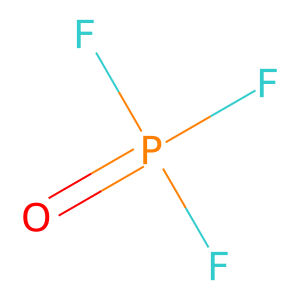

In [33]:
print(insat("P(F)(F)(F)(F)F"))
Phosphorus_pentafluoride= Chem.MolFromSmiles("P(=O)(F)(F)F")
Phosphorus_pentafluoride

# The functions that make the buttons work

There isn't much to say about these functions, they are used in the main function to make the buttons work.
The submitboom and submitinsat functions make the submit buttons of their respective tabs work.
It doesn't make much sense to give examples for those.

The open_pubchem_sketcher function is a bit more interesting, it makes the open pubchem sketcher button work on both tabs. It opens another tab on your internet browser where you can draw any molecule you like. On the top of the skecther, the smiles of the molecule is given. You can copy it into the other functions. This can be very useful if you don't know the smiles nor the iupac name of a molecule bur you know its structure. This function requires the internet to work.

In [34]:
#Let's test this last function
from explosivity_and_unsaturations import open_pubchem_sketcher 
open_pubchem_sketcher()

# The main function that links everything together

There isn't much to say about this function either, this function is not thought to be used in other functions. It uses all the other functions and puts everything in a nice interface to use. 

Everytime the function is used, another window is opened which contains two tabs, one for the explosivity and one for the degree of unsaturation. To use those tabs, select if you want to use a smiles or a iupac name, enter your molecule and press the button submit on the interface or enter on your keyboard.

<img src="https://raw.githubusercontent.com/amidecar/Explosivity_and_unsaturations/main/notebooks/pictures/window%20area.png" alt="drawing" width="500">


This is the *main()* function ***window***. Let us show you it's features.

<img src="https://raw.githubusercontent.com/amidecar/Explosivity_and_unsaturations/main/notebooks/pictures/tabs.png" alt="drawing" width="500" > <img src="https://raw.githubusercontent.com/amidecar/Explosivity_and_unsaturations/main/notebooks/pictures/inputs.png" alt="drawing" width="580" >

You can see ***two tabs***, they access different features of our package: the explosivity part and unsaturation part.

There are ***two radio buttons*** to chose the input type: SMILES or IUPAC name.

There is a ***text input*** associated with each type on input.

<img src="https://raw.githubusercontent.com/amidecar/Explosivity_and_unsaturations/main/notebooks/pictures/submit.png" alt="drawing" width="580" >

To submit your molecule, there is a ***submit button***.

If you do not know the exact name of the molecule, nor know it's SMILES, you can draw the molecule on ***Pubchem's sketcher*** and copy paste its SMILES.

In [4]:
from explosivity_and_unsaturations import main
main()

The window can now be openened at will